In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('parking_data_entry_exit.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53174 entries, 0 to 53173
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   vehicle_no       53148 non-null  object
 1   timestamp_entry  53174 non-null  object
 2   timestamp_exit   53174 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [3]:
df['vehicle_no'] = df['vehicle_no'].astype(str)
df['timestamp_entry'] = pd.to_datetime(df['timestamp_entry'])
df['timestamp_exit'] = pd.to_datetime(df['timestamp_exit'])

In [4]:
df['duration'] = (df['timestamp_exit'] - df['timestamp_entry']).dt.total_seconds()
df

,vehicle_no,timestamp_entry,timestamp_exit,duration
0,MHUN7063,2024-09-12 05:00:00,2024-09-12 08:00:00,10800.0
1,MHMY1867,2024-09-12 05:00:00,2024-09-12 09:20:00,15600.0
2,MHZF8417,2024-09-12 05:00:00,2024-09-12 09:20:00,15600.0
3,MHFU6425,2024-09-12 05:00:00,2024-09-12 09:40:00,16800.0
4,MHHB4038,2024-09-12 05:00:00,2024-09-12 09:20:00,15600.0
...,...,...,...,...
53169,MHDF3718,2024-11-13 20:00:00,2024-11-14 00:00:00,14400.0
53170,MHQJ4009,2024-11-13 20:00:00,2024-11-14 00:00:00,14400.0
53171,MHPN3450,2024-11-13 20:00:00,2024-11-14 00:00:00,14400.0
53172,MHBB9719,2024-11-13 20:00:00,2024-11-14 00:00:00,14400.0


In [11]:
# draw graph between which day of the week vs average duration
df['date'] = df['timestamp_entry'].dt.date
df_days = df.groupby('date')['duration'].mean()
df_days



date
2024-09-12    25392.808989
2024-09-13    61245.421245
2024-09-14    48343.843498
2024-09-15    56724.653740
2024-09-16    50038.588235
                  ...     
2024-11-09    18550.978136
2024-11-10    17167.372881
2024-11-11    16836.231884
2024-11-12    17394.044665
2024-11-13    18739.052497
Name: duration, Length: 63, dtype: float64

In [13]:
df_days.info()

<class 'pandas.core.series.Series'>
Index: 63 entries, 2024-09-12 to 2024-11-13
Series name: duration
Non-Null Count  Dtype  
--------------  -----  
63 non-null     float64
dtypes: float64(1)
memory usage: 3.0+ KB


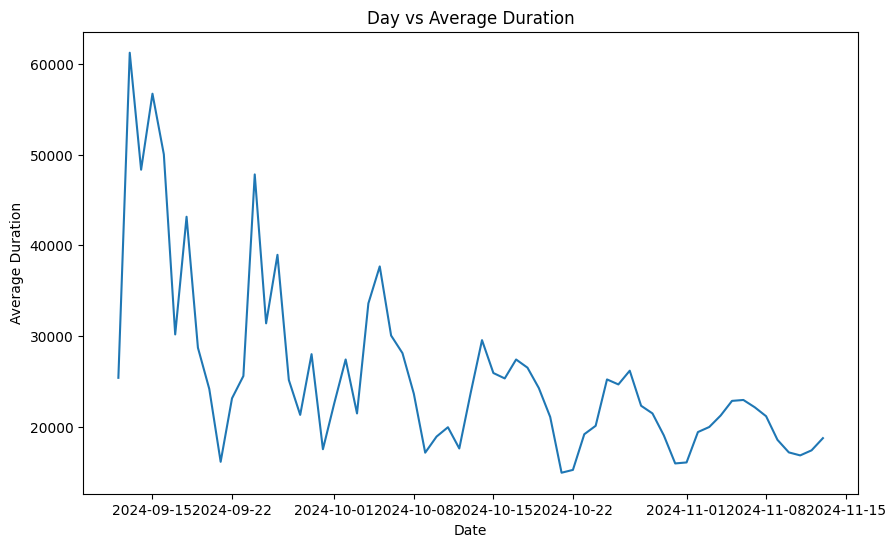

In [9]:
# plot day vs average duration
plt.figure(figsize=(10, 6))
plt.plot(df_days.index, df_days.values)
plt.xlabel('Date')
plt.ylabel('Average Duration')
plt.title('Day vs Average Duration')
plt.show()


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

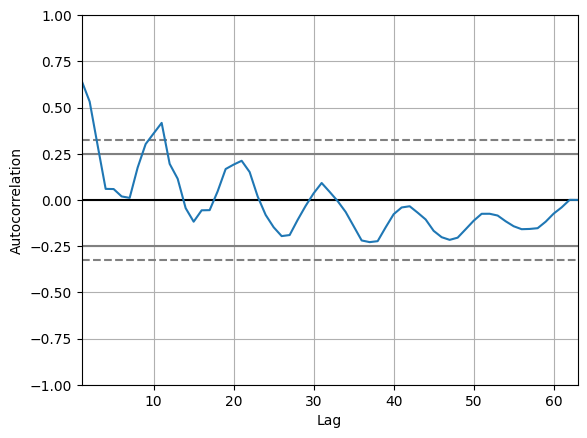

In [14]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_days)

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df_days.values.reshape(-1, 1))
scaled_data = pd.DataFrame(scaled_values, columns=['avg_duration'])
scaled_data.index = df_days.index
scaled_data


,avg_duration
date,
2024-09-12,0.225978
2024-09-13,1.000000
2024-09-14,0.721468
2024-09-15,0.902401
2024-09-16,0.758056
...,...
2024-11-09,0.078270
2024-11-10,0.048399
2024-11-11,0.041250


In [39]:
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

X = scaled_data.values
size = int(len(X) * 0.7)
train, test  = X[0:size], X[size:len(X)]

history = [x for x in train]
predictions1 = list()
for t in range(len(test)):
    model = sm.tsa.arima.ARIMA(history, order=(2,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    temp  = output[0]
    predictions1.append(temp)
    obs = test[t]
    history.append(obs)
print(mean_absolute_error(test, predictions1))

history = [x for x in train]
predictions2 = list()
for t in range(len(test)):
    model = sm.tsa.arima.ARIMA(history, order=(1,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    temp  = output[0]
    predictions2.append(temp)
    obs = test[t]
    history.append(obs)
print(mean_absolute_error(test, predictions2))

history = [x for x in train]
predictions3 = list()
for t in range(len(test)):
    model = sm.tsa.arima.ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    temp  = output[0]
    predictions3.append(temp)
    obs = test[t]
    history.append(obs)
print(mean_absolute_error(test, predictions3))



C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0.04142723126622877
0.06493734400808951
0.04266532508939427


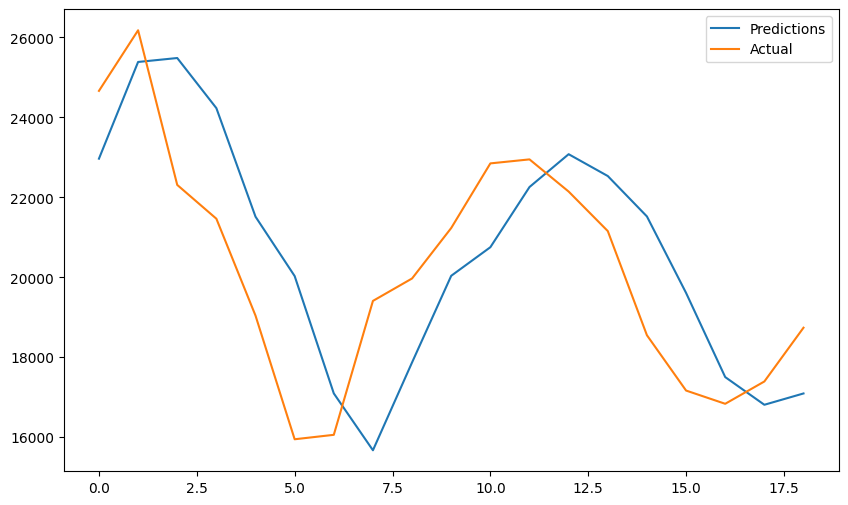

1918.9053754049612


In [47]:
unscaled_predictions = scaler.inverse_transform(np.array(predictions1).reshape(-1, 1))
unscaled_test = scaler.inverse_transform(test)

plt.figure(figsize=(10, 6))
plt.plot(unscaled_predictions, label='Predictions')
plt.plot(unscaled_test, label='Actual')
plt.legend()
plt.show()

In [74]:
def MASE(actual, pred):
    n = len(actual)
    d = np.abs(np.diff(actual)).sum() / (n - 1)
    if d == 0:
        return np.inf  # or handle the zero case appropriately
    errors = np.abs(actual - pred).sum()
    return errors.mean() / d
    

In [75]:
from sklearn.metrics import mean_absolute_percentage_error
print("MAPE: ", mean_absolute_percentage_error(unscaled_test, unscaled_predictions)*100)
print("MASE: ", MASE(unscaled_test.reshape(1, -1)[0], unscaled_predictions.reshape(1, -1)[0]))


MAPE:  9.82615993155666
MASE:  24.523199773014582
